In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
# load dataframe
df_TCRA_reads = pd.read_csv("../summary_data/original/all_tools_TRA_reads.csv")
df_TCRA_reads.columns = ['Sample','tissue','tissue_type','repertoire_type','class','TRA_total_reads_tool','total_reads_RNA_seq','tool','TRA_derived_by_RNA_seq_tool']                      

df_TCRB_reads = pd.read_csv("../summary_data/original/all_tools_TRB_reads.csv")
df_TCRB_reads = df_TCRB_reads[['Sample','tissue','tissue_type','repertoire_type','class','total_reads_tool','total_reads_RNA_seq','tool','TCR_derived_by_RNA_seq_tool']]
df_TCRB_reads.columns = ['Sample', 'tissue','tissue_type', 'repertoire_type','class', 'TRB_total_reads_tool','total_reads_RNA_seq','tool','TRB_derived_by_RNA_seq_tool']   

Number of TCRA and TCRB derived reads from RNA-Seq per one million RNA-Seq reads

In [3]:
# prepare the reads dataframe 
df_reads = pd.merge(df_TCRA_reads, df_TCRB_reads, how='outer', on=['Sample','tissue','tissue_type','repertoire_type','class','tool','total_reads_RNA_seq']).fillna(0)
df_reads = df_reads[['Sample','tissue','tissue_type','repertoire_type','class','tool','TRA_derived_by_RNA_seq_tool','TRB_derived_by_RNA_seq_tool']]
df_reads.rename(columns={'TRA_derived_by_RNA_seq_tool':'TRA','TRB_derived_by_RNA_seq_tool':'TRB'}, inplace=True)

In [4]:
# reshape the dataframe for plotting and calculation
df_reads_melt = pd.melt(df_reads, id_vars=['Sample','tissue','tissue_type','repertoire_type','class','tool'], var_name="chain", value_name="reads_derived_by_RNA_seq_tool")
df_reads_melt

Sample           tissue  tissue_type repertoire_type  \
0      SRR5233637  small_intestine  T_cell_poor      polyclonal   
1      SRR5233639       lymph_node  T_cell_rich      polyclonal   
2    TCGA-CZ-4862           kidney  T_cell_poor      polyclonal   
3    TCGA-CZ-5463           kidney  T_cell_poor      polyclonal   
4    TCGA-CZ-5985           kidney  T_cell_poor      polyclonal   
..            ...              ...          ...             ...   
109      sample10         melanoma  T_cell_poor      polyclonal   
110      sample11         melanoma  T_cell_poor      polyclonal   
111      sample12         melanoma  T_cell_poor      polyclonal   
112      sample13         melanoma  T_cell_poor      monoclonal   
113      sample14         melanoma  T_cell_poor      polyclonal   

                      class    tool chain  reads_derived_by_RNA_seq_tool  
0    T_cell_poor_polyclonal   MIXCR   TRA                       0.330031  
1    T_cell_rich_polyclonal   MIXCR   TRA                       8.788023  
2    T_cell_poor_polyclonal   MIXCR   TRA                       0.000000  
3    T_cell_poor_polyclonal   MIXCR   TRA                       0.000000  
4    T_cell_poor_polyclonal   MIXCR   TRA                       0.000000  
..                      ...     ...   ...                            ...  
109  T_cell_poor_polyclonal  TRUST4   TRB                       4.832537  
110  T_cell_poor_polyclonal  TRUST4   TRB                       1.130494  
111  T_cell_poor_polyclonal  TRUST4   TRB                       0.361382  
112  T_cell_poor_monoclonal  TRUST4   TRB                      35.411950  
113  T_cell_poor_polyclonal  TRUST4   TRB                       6.275515  

[114 rows x 8 columns]

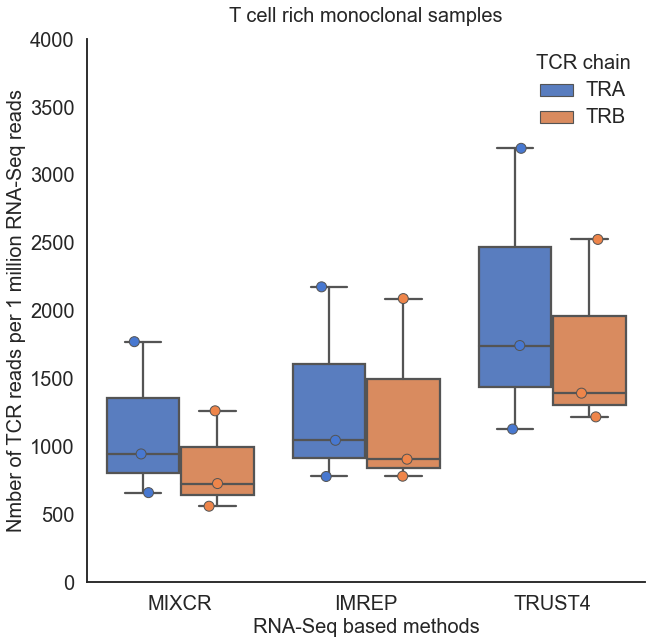

In [5]:
sns.set_style("white") 
sns.set_context("talk")  

reads_figure = df_reads_melt.loc[df_reads_melt['class'] == 'T_cell_rich_monoclonal']
ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x="tool",y="reads_derived_by_RNA_seq_tool",data=reads_figure,palette="muted",hue='chain')
sns.stripplot(x="tool",y="reads_derived_by_RNA_seq_tool",data=reads_figure,s=10,color=".3",palette="muted",hue='chain',dodge=True,linewidth=1)
ax.set(ylim=(0, 4000))
ax.set_xlabel('RNA-Seq based methods',fontsize=20)
ax.set_ylabel('Nmber of TCR reads per 1 million RNA-Seq reads',fontsize=20)
plt.title('T cell rich monoclonal samples',y=1.02,fontsize=20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1, 1), frameon=False, title='TCR chain')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS11a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS11a.png",bbox_inches="tight")

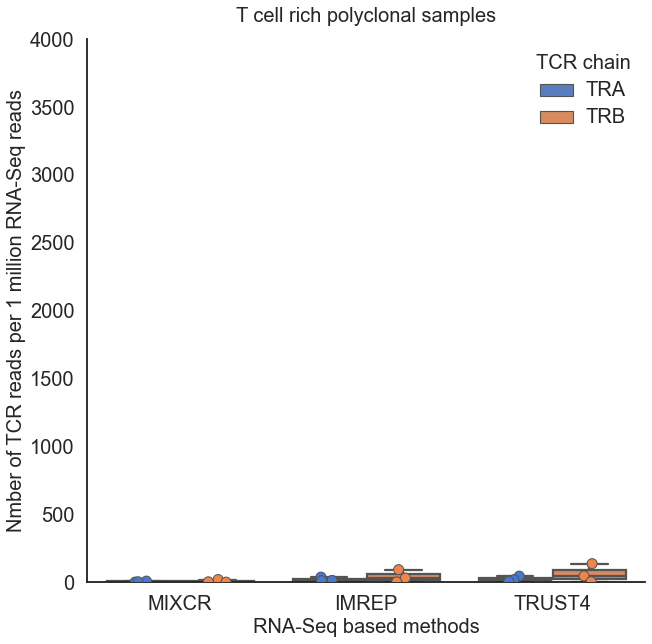

In [6]:
sns.set_style("white") 
sns.set_context("talk")  

reads_figure = df_reads_melt.loc[df_reads_melt['class'] == 'T_cell_rich_polyclonal']

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x="tool",y="reads_derived_by_RNA_seq_tool",data=reads_figure,palette="muted",hue='chain')
sns.stripplot(x="tool",y="reads_derived_by_RNA_seq_tool",data=reads_figure,s=10,color=".3",palette="muted",hue='chain',dodge=True,linewidth=1)
ax.set(ylim=(0, 4000))
ax.set_xlabel('RNA-Seq based methods',fontsize=20)
ax.set_ylabel('Nmber of TCR reads per 1 million RNA-Seq reads',fontsize=20)
plt.title('T cell rich polyclonal samples',y=1.02,fontsize=20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1, 1), frameon=False, title='TCR chain')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS11b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS11b.png",bbox_inches="tight")

In [7]:
# Calculate the Pearson correlation for T_cell_rich monoclonal repertoires
T_cell_rich_monoclonal = df_reads.loc[(df_reads['class'] == 'T_cell_rich_monoclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_monoclonal.loc[(T_cell_rich_monoclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9998032243855183, 0.012629550134750056)
IMREP Pearson correlation coefficient:(0.9956015327350198, 0.05973173328766697)
TRUST4 Pearson correlation coefficient:(0.9854849247084745, 0.10860041601171014)


In [8]:
# Calculate the Pearson correlation for T_cell_rich polyclonal repertoires
T_cell_rich_polyclonal = df_reads.loc[(df_reads['class'] == 'T_cell_rich_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_polyclonal.loc[(T_cell_rich_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.909099987145457, 0.2735414307830786)
IMREP Pearson correlation coefficient:(0.9703970653183035, 0.1552886564978829)
TRUST4 Pearson correlation coefficient:(0.9999935411163589, 0.002288095172850446)


In [9]:
# Calculate the Pearson correlation for T_cell_poor polyclonal repertoires
T_cell_poor_polyclonal = df_reads.loc[(df_reads['class'] == 'T_cell_poor_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_poor_polyclonal.loc[(T_cell_poor_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9298519828302144, 1.1881292133727809e-05)
IMREP Pearson correlation coefficient:(-0.0028773442419980783, 0.9929191138193179)
TRUST4 Pearson correlation coefficient:(0.935544527380864, 7.858037506199715e-06)


In [10]:
repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_monoclonal','T_cell_poor_polyclonal']
tools = ['MIXCR','IMREP','TRUST4']     

for repertoire_class in repertoire_classes: 
    print(repertoire_class)
    df_repertoire = df_reads_melt.loc[df_reads_melt['class'] == repertoire_class]
    mean_reads = df_repertoire.groupby("chain")["reads_derived_by_RNA_seq_tool"].agg(["mean", "std"])
    display(mean_reads)          
    for tool in tools:  
        print(tool)
        df_tool = df_repertoire.loc[df_repertoire['tool'] == tool]
        mean_reads = df_tool.groupby("chain")["reads_derived_by_RNA_seq_tool"].agg(["mean", "std"]) 
        display(mean_reads)

T_cell_rich_monoclonal


mean         std
chain                         
TRA    1492.877283  816.528193
TRB    1272.770106  654.592373

MIXCR


mean         std
chain                         
TRA    1125.008509  576.990621
TRB     849.436733  366.742010

IMREP


mean         std
chain                         
TRA    1332.553983  740.865797
TRB    1258.189905  721.166385

TRUST4


mean          std
chain                          
TRA    2021.069358  1060.681885
TRB    1710.683680   708.940058

T_cell_rich_polyclonal


mean        std
chain                      
TRA    16.786843  15.316855
TRB    37.868287  47.668130

MIXCR


mean        std
chain                    
TRA    4.76161   3.671854
TRB    8.47019  10.390502

IMREP


mean        std
chain                      
TRA    21.542158  14.644833
TRB    42.391155  46.168832

TRUST4


mean        std
chain                      
TRA    24.056761  19.502926
TRB    62.743517  67.780944

T_cell_poor_monoclonal


mean        std
chain                      
TRA    11.340920   6.950539
TRB    19.721541  13.661024

MIXCR


mean  std
chain                
TRA     8.930509  NaN
TRB    13.284133  NaN

IMREP


mean  std
chain                
TRA     5.916462  NaN
TRB    10.468541  NaN

TRUST4


mean  std
chain                
TRA    19.175788  NaN
TRB    35.411950  NaN

T_cell_poor_polyclonal


mean       std
chain                    
TRA    1.765847  2.119843
TRB    2.837563  3.558914

MIXCR


mean       std
chain                    
TRA    0.461691  0.773593
TRB    0.981210  1.331736

IMREP


mean       std
chain                    
TRA    2.084705  1.944820
TRB    1.733860  1.737552

TRUST4


mean       std
chain                    
TRA    2.751146  2.625270
TRB    5.797618  4.567406

Number of TCRA and TCRB clonotype

In [11]:
# load dataframe
df_TCRA_diversity = pd.read_csv("../summary_data/original/all_tools_TRA_diversity.csv")
df_TCRA_diversity = df_TCRA_diversity[['Sample','shannon_index_tool','clonotype_count_tool','shannon_index_TCR','tool','repertoire_type','tissue_type','class']]
df_TCRA_diversity.columns = ['Sample', 'TRA_shannon_index','TRA_clonotype_count','TRA_shannon_index','tool','repertoire_type','tissue_type','class']

df_TCRB_diversity = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")
df_TCRB_diversity = df_TCRB_diversity[['Sample','shannon_index_tool','clonotype_count_tool','shannon_index_TCR','tool','repertoire_type','tissue_type','class']]
df_TCRB_diversity.columns = ['Sample', 'TRB_shannon_index','TRB_clonotype_count','TRB_shannon_index','tool','repertoire_type','tissue_type','class']

# merge dataframe
df_diversity = pd.merge(df_TCRA_diversity, df_TCRB_diversity, how='outer', on=['Sample','tool','repertoire_type','tissue_type','class']).fillna(0)
df_diversity["repertoire_type"].replace({0: "polyclonal"}, inplace=True)
df_diversity = df_diversity.fillna(0)
df_diversity

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Sample  TRA_shannon_index  TRA_clonotype_count  TRA_shannon_index  \
0     SRR5233637           2.243330                   10           7.712411   
1     SRR5233637           4.060569                   61           7.712411   
2     SRR5233637           3.707485                   45           7.712411   
3     SRR5233639           4.806690                  172          10.059157   
4     SRR5233639           6.752855                 1024          10.059157   
5     SRR5233639           6.189057                  802          10.059157   
6       sample01           0.535771                 2215           1.072675   
7       sample01           0.824119                 2953           1.072675   
8       sample01           0.958934                 3427           1.072675   
9       sample02           0.780964                 1414           1.001202   
10      sample02           1.940628                 3501           1.001202   
11      sample02           1.957890                 4138           1.001202   
12      sample03           0.537242                 1081           0.960516   
13      sample03           1.338524                 3045           0.960516   
14      sample03           1.623211                 3354           0.960516   
15      sample04           3.317101                   29           9.598323   
16      sample04           5.501236                  258           9.598323   
17      sample04           5.429569                  286           9.598323   
18      sample05           1.085516                   14           8.005115   
19      sample05           3.478637                  106           8.005115   
20      sample05           1.466458                   25           8.005115   
21      sample06           3.092193                   23           8.172351   
22      sample06           4.125943                   65           8.172351   
23      sample06           4.938231                  160           8.172351   
24      sample07           0.000000                    1           4.680209   
25      sample07           0.764754                    3           4.680209   
26      sample07           1.078992                    3           4.680209   
27      sample08           3.285624                   30           8.035551   
28      sample08           3.723224                   52           8.035551   
29      sample08           3.646572                   54           8.035551   
30      sample09           2.860813                   28           7.651713   
31      sample09           3.062647                   34           7.651713   
32      sample09           3.785934                   84           7.651713   
33      sample10           0.885574                    4           7.207395   
34      sample10           2.336019                   13           7.207395   
35      sample10           2.622434                   23           7.207395   
36      sample11           0.693147                    2           7.730309   
37      sample11           1.329661                    4           7.730309   
38      sample11           2.401463                   12           7.730309   
39      sample12           0.000000                    1           6.546400   
40      sample12           0.673012                    2           6.546400   
41      sample12           1.475076                    5           6.546400   
42      sample13           3.933625                   92           1.520791   
43      sample13           3.850765                   83           1.520791   
44      sample13           4.174940                  131           1.520791   
45      sample14           1.564957                    5           6.941821   
46      sample14           2.400174                   12           6.941821   
47      sample14           3.163159                   29           6.941821   
48  TCGA-CZ-4862           3.838735                   80           7.485462   
49  TCGA-CZ-4862           3.269627                   41    

In [12]:
# prepare the clonotype dataframe
df_clonotype = df_diversity[['Sample','repertoire_type','tissue_type','class','tool','TRA_clonotype_count','TRB_clonotype_count']]
df_clonotype.rename(columns={'TRA_clonotype_count':'TRA','TRB_clonotype_count':'TRB'}, inplace=True)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
# reshape the dataframe for plotting and calculation
df_clonotype_melt = pd.melt(df_clonotype, id_vars=['Sample','repertoire_type','tissue_type','class','tool'], var_name="chain", value_name="clonotype_counts")
df_clonotype_melt

Sample repertoire_type  tissue_type                   class  \
0      SRR5233637      polyclonal  T_cell_poor  T_cell_poor_polyclonal   
1      SRR5233637      polyclonal  T_cell_poor  T_cell_poor_polyclonal   
2      SRR5233637      polyclonal  T_cell_poor  T_cell_poor_polyclonal   
3      SRR5233639      polyclonal  T_cell_rich  T_cell_rich_polyclonal   
4      SRR5233639      polyclonal  T_cell_rich  T_cell_rich_polyclonal   
..            ...             ...          ...                     ...   
103  TCGA-CZ-4862      polyclonal  T_cell_poor  T_cell_poor_polyclonal   
104  TCGA-CZ-5463      polyclonal  T_cell_poor  T_cell_poor_polyclonal   
105  TCGA-CZ-5463      polyclonal  T_cell_poor  T_cell_poor_polyclonal   
106  TCGA-CZ-5985      polyclonal  T_cell_poor  T_cell_poor_polyclonal   
107  TCGA-CZ-5985      polyclonal  T_cell_poor  T_cell_poor_polyclonal   

       tool chain  clonotype_counts  
0     MIXCR   TRA              10.0  
1     IMREP   TRA              61.0  
2    TRUST4   TRA              45.0  
3     MIXCR   TRA             172.0  
4     IMREP   TRA            1024.0  
..      ...   ...               ...  
103  TRUST4   TRB              67.0  
104   IMREP   TRB               4.0  
105  TRUST4   TRB              24.0  
106   IMREP   TRB               2.0  
107  TRUST4   TRB              22.0  

[108 rows x 7 columns]

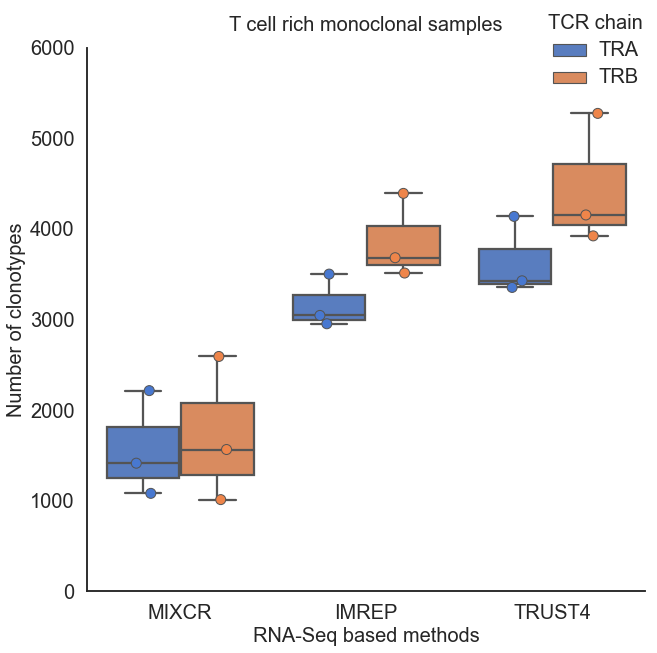

In [14]:
sns.set_style("white") 
sns.set_context("talk")  

clonotype_figure = df_clonotype_melt.loc[df_clonotype_melt['class'] == 'T_cell_rich_monoclonal']
ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x="tool",y="clonotype_counts",data=clonotype_figure,palette="muted",hue='chain')
sns.stripplot(x="tool",y="clonotype_counts",data=clonotype_figure,s=10,color=".3",palette="muted",hue='chain',dodge=True,linewidth=1)
ax.set(ylim=(0, 6000))
ax.set_xlabel('RNA-Seq based methods',fontsize=20)
ax.set_ylabel('Number of clonotypes',fontsize=20)
plt.title('T cell rich monoclonal samples',y=1.02,fontsize=20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.8,0.9), frameon=False, title='TCR chain')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS11c.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS11c.png",bbox_inches="tight")

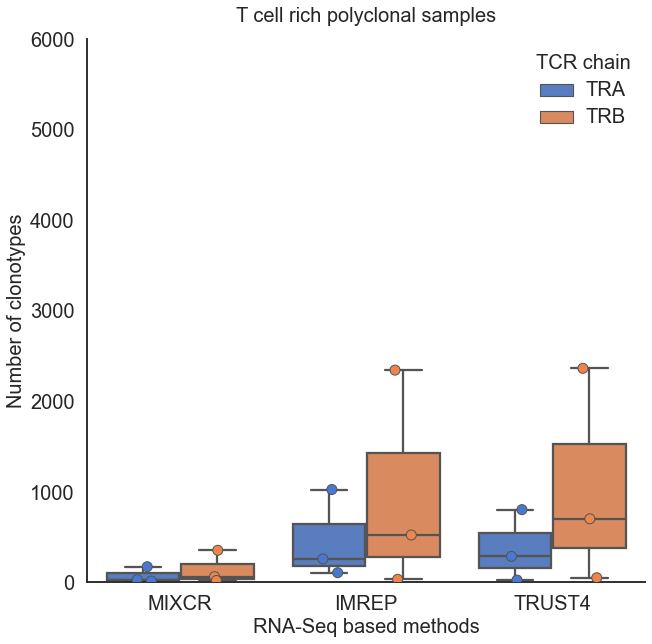

In [15]:
sns.set_style("white") 
sns.set_context("talk")  

clonotype_figure = df_clonotype_melt.loc[df_clonotype_melt['class'] == 'T_cell_rich_polyclonal']
ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x="tool",y="clonotype_counts",data=clonotype_figure,palette="muted",hue='chain')
sns.stripplot(x="tool",y="clonotype_counts",data=clonotype_figure,s=10,color=".3",palette="muted",hue='chain',dodge=True,linewidth=1)
ax.set(ylim=(0, 6000))
ax.set_xlabel('RNA-Seq based methods',fontsize=20)
ax.set_ylabel('Number of clonotypes',fontsize=20)
plt.title('T cell rich polyclonal samples',y=1.02,fontsize=20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1, 1), frameon=False, title='TCR chain')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS11d.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS11d.png",bbox_inches="tight")
plt.show()

In [16]:
# Calculate the Pearson correlation for T_cell_rich monoclonal repertoires
T_cell_rich_monoclonal = df_clonotype.loc[(df_clonotype['class'] == 'T_cell_rich_monoclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_monoclonal.loc[(T_cell_rich_monoclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9980533485557745, 0.03972918863155259)
IMREP Pearson correlation coefficient:(0.9428970006615967, 0.2161788437323265)
TRUST4 Pearson correlation coefficient:(0.9971115161550358, 0.04839881019678433)


In [17]:
# Calculate the Pearson correlation for T_cell_rich polyclonal repertoires
T_cell_rich_polyclonal = df_clonotype.loc[(df_clonotype['class'] == 'T_cell_rich_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_polyclonal.loc[(T_cell_rich_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9995513813489435, 0.01906997048008184)
IMREP Pearson correlation coefficient:(0.9988844230269396, 0.030073589943782782)
TRUST4 Pearson correlation coefficient:(0.998212190190817, 0.03807329842447754)


In [18]:
# Calculate the Pearson correlation for T_cell_poor polyclonal repertoires
T_cell_poor_polyclonal = df_clonotype.loc[(df_clonotype['class'] == 'T_cell_poor_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_poor_polyclonal.loc[(T_cell_poor_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.867353641447062, 0.0024524065291892166)
IMREP Pearson correlation coefficient:(0.21710363513796857, 0.49790574793022746)
TRUST4 Pearson correlation coefficient:(0.9517011463241551, 1.9083135071830247e-06)


In [19]:
repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_monoclonal','T_cell_poor_polyclonal']
tools = ['MIXCR','IMREP','TRUST4']     

for repertoire_class in repertoire_classes: 
    print(repertoire_class)
    df_repertoire = df_clonotype_melt.loc[df_clonotype_melt['class'] == repertoire_class]
    mean_clonotype = df_repertoire.groupby("chain")["clonotype_counts"].agg(["mean", "std"])
    display(mean_clonotype)          
    for tool in tools:  
        print(tool)
        df_tool = df_repertoire.loc[df_repertoire['tool'] == tool]
        mean_clonotype = df_tool.groupby("chain")["clonotype_counts"].agg(["mean", "std"]) 
        display(mean_clonotype)

T_cell_rich_monoclonal


mean          std
chain                          
TRA    2792.000000  1017.517199
TRB    3345.333333  1375.216528

MIXCR


mean         std
chain                    
TRA    1570.0  582.873057
TRB    1723.0  801.762434

IMREP


mean         std
chain                         
TRA    3166.333333  293.457549
TRB    3862.333333  466.422913

TRUST4


mean         std
chain                         
TRA    3639.666667  433.110071
TRB    4450.666667  723.176558

T_cell_rich_polyclonal


mean         std
chain                        
TRA    301.777778  364.519128
TRB    716.111111  958.188322

MIXCR


mean         std
chain                        
TRA     71.666667   87.214295
TRB    145.000000  181.353246

IMREP


mean          std
chain                         
TRA    462.666667   492.033874
TRB    965.666667  1216.758124

TRUST4


mean          std
chain                          
TRA     371.000000   395.412443
TRB    1037.666667  1192.201465

T_cell_poor_monoclonal


mean        std
chain                  
TRA    102.0  25.514702
TRB    129.0  41.073106

MIXCR


mean  std
chain           
TRA    92.0  NaN
TRB    96.0  NaN

IMREP


mean  std
chain            
TRA     83.0  NaN
TRB    116.0  NaN

TRUST4


mean  std
chain            
TRA    131.0  NaN
TRB    175.0  NaN

T_cell_poor_polyclonal


mean        std
chain                      
TRA    32.424242  35.491223
TRB    43.969697  46.470074

MIXCR


mean        std
chain                      
TRA    11.555556  12.032364
TRB    22.111111  16.366463

IMREP


mean        std
chain                      
TRA    40.500000  32.789965
TRB    37.583333  39.619688

TRUST4


mean        std
chain                  
TRA    40.00  44.652191
TRB    66.75  59.296060